# Homework 6 Mushroom Analysis with ML

## Step 1. Understanding the data


### 1.	What are the columns representing?


class

•	classification of the mushroom (e.g., edible or poisonous)

•	edible=e, poisonous=p

cap-shape

•	Shape of the mushroom's cap (e.g., bell, conical, convex, flat, knobbed, sunken)

•	bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

cap-surface

•	Surface texture of the cap (e.g., fibrous, grooves, scaly, smooth)

•	fibrous=f, grooves=g, scaly=y, smooth=s

cap-color

•	Color of the cap (e.g., brown, buff, cinnamon, gray, green, pink, purple, red, white, yellow)

•	brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

bruises

•	Whether the mushroom has bruises (bruises=t, no=f)

•	bruises=t, no=f

odor

•	Odor of the mushroom (e.g., almond, anise, creosote, fishy, foul, musty, none, pungent, spicy)

•	almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

gill-attachment

•	How the gills are attached to the stalk (e.g., attached, descending, free, notched)

•	attached=a, descending=d, free=f, notched=n

gill-spacing

•	Spacing between the gills (e.g., close, crowded, distant)

•	close=c, crowded=w, distant=d

gill-size

•	Size of the gills (e.g., broad, narrow)

•	broad=b, narrow=n

gill-color

•	Color of the gills (e.g., black, brown, buff, chocolate, gray, green, orange, pink, purple, red, white, yellow)

•	black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

stalk-shape

•	Shape of the stalk (e.g., enlarging, tapering)

•	enlarging=e, tapering=t

stalk-root

•	Root of the stalk (e.g., bulbous, club, cup, equal, rhizomorphs, rooted, missing)

•	bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
stalk-surface-above-ring

stalk-surface-above-ring

•	Surface texture of the stalk above the ring (e.g., fibrous, scaly, silky, smooth)

•	fibrous=f, scaly=y, silky=k, smooth=s

stalk-surface-below-ring

•	Surface texture of the stalk below the ring (e.g., fibrous, scaly, silky, smooth)

•	fibrous=f, scaly=y, silky=k, smooth=s

stalk-color-above-ring

•	Color of the stalk above the ring (e.g., brown, buff, cinnamon, gray, orange, pink, red, white, yellow)

•	brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

stalk-color-below-ring

•	Color of the stalk below the ring (e.g., brown, buff, cinnamon, gray, orange, pink, red, white, yellow)

•	brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

veil-type

•	Type of veil (e.g., partial, universal)

•	partial=p, universal=u

veil-color

•	Color of the veil (e.g., brown, orange, white, yellow)

•	brown=n, orange=o, white=w, yellow=y

ring-number

•	Number of rings on the stalk (e.g., none, one, two)

•	none=n, one=o, two=t

ring-type

•	Type of ring (e.g., cobwebby, evanescent, flaring, large, none, pendant, sheathing, zone)

•	cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

spore-print-color

•	Color of the spore print (e.g., black, brown, buff, chocolate, green, orange, purple, white, yellow)

•	black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

Population

•	Population distribution of the mushroom (e.g., abundant, clustered, numerous, scattered, several, solitary)

•	abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
Habitat

•	Habitat where the mushroom is found (e.g., grasses, leaves, meadows, paths, urban, waste, woods)

•	grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

### 2.	Which column is the target column (the predicted one)?

The target column is the first column in the dataset, which is the classification of the mushroom (either 'e'=edible, or 'p'=poisonous). This column will be predicted using machine learning algorithms.

### 3.	List out what each unique 'char' represents.

(Listed as 1.1 Above)

### 4.	Create a mapping of 'chars' to their numerical representation.

(Implemented in Step 2)

## Step 2. Pre-Processing


In [5]:
# Import packages
import pandas as pd
import numpy as np
from sklearn import svm, tree
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [7]:
# Load the dataset
column_names = ["class","cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type","spore-print-color","population","habitat"]

df = pd.read_csv("data/Mushroom_data.txt", header=None, names=column_names)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
# Check for columns with null/na values
np.where(pd.isna(df))

(array([], dtype=int64), array([], dtype=int64))

In [9]:
# Check for missing values
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [10]:
# Get the shape / info of the dataset
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [12]:
# Get statistical descriptions of the df
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [13]:
# Get unique values from each column, preparing for the numerical conversion
for col in df.columns:
    print(col,df[col].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


#### Create a mapping of 'chars' to their numerical representation

In [14]:
df2 = df.copy()

# Perform Label Encoding on all 23 features
for col in df2.columns:
    le = LabelEncoder()
    le.fit(df2[col])
    df2[col] = le.transform(df2[col])
    # if col == 'class':
    # Display the detailed mapping relationship from 'chars' to numerical representation
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)

{'e': 0, 'p': 1}
{'b': 0, 'c': 1, 'f': 2, 'k': 3, 's': 4, 'x': 5}
{'f': 0, 'g': 1, 's': 2, 'y': 3}
{'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'p': 5, 'r': 6, 'u': 7, 'w': 8, 'y': 9}
{'f': 0, 't': 1}
{'a': 0, 'c': 1, 'f': 2, 'l': 3, 'm': 4, 'n': 5, 'p': 6, 's': 7, 'y': 8}
{'a': 0, 'f': 1}
{'c': 0, 'w': 1}
{'b': 0, 'n': 1}
{'b': 0, 'e': 1, 'g': 2, 'h': 3, 'k': 4, 'n': 5, 'o': 6, 'p': 7, 'r': 8, 'u': 9, 'w': 10, 'y': 11}
{'e': 0, 't': 1}
{'?': 0, 'b': 1, 'c': 2, 'e': 3, 'r': 4}
{'f': 0, 'k': 1, 's': 2, 'y': 3}
{'f': 0, 'k': 1, 's': 2, 'y': 3}
{'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'o': 5, 'p': 6, 'w': 7, 'y': 8}
{'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'o': 5, 'p': 6, 'w': 7, 'y': 8}
{'p': 0}
{'n': 0, 'o': 1, 'w': 2, 'y': 3}
{'n': 0, 'o': 1, 't': 2}
{'e': 0, 'f': 1, 'l': 2, 'n': 3, 'p': 4}
{'b': 0, 'h': 1, 'k': 2, 'n': 3, 'o': 4, 'r': 5, 'u': 6, 'w': 7, 'y': 8}
{'a': 0, 'c': 1, 'n': 2, 's': 3, 'v': 4, 'y': 5}
{'d': 0, 'g': 1, 'l': 2, 'm': 3, 'p': 4, 'u': 5, 'w': 6}


Given the complete mapping relationship above, in the target column 'class', 'edible' is encoded to 0, and 'poisonous' as 1.

In [15]:
# Count for 'edible' (0) vs 'poisonous' (1)
counts = df2['class'].value_counts()
print(counts)

class
0    4208
1    3916
Name: count, dtype: int64


In [16]:
print((4208 / (4208 + 3916))*100)

51.7971442639094


The dataset is roughly balanced for edible vs poisonous mushrooms, which can bring a less biased model with better prediction accuracy.

In [17]:
df2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### Convert into a numerical dataset and save

In [18]:
df2.to_csv('data/Mushroom_number.csv', index=False)

## Step 3. Machine Learning

In [19]:
# Visualize the correlation matrix to identify relationships between features
corr = df2.corr()
corr.style.background_gradient('coolwarm')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,-0.334593,-0.298801,-0.154003,-0.146730,nan,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,-0.030417,-0.032591,-0.031659,-0.030390,nan,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,nan,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,-0.060837,-0.047710,0.002364,0.008057,nan,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,nan,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,0.118617,0.061820,0.174532,0.169407,nan,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,nan,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,nan,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,nan,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,nan,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [20]:
# Check for the veil-type column, which has nan only based the on correlation matrix
df2['veil-type'].nunique()

1

In the original dataset, the `veil-type` contains only one value 'p', which has been encoded to 0. This column may not be helpful in the later prediction and will be dropped then.

In [21]:
# Drop the 'veil-type' cloumn for only 1 value contained
df3 = df2.copy()
df3.drop(df3.columns[16], axis=1, inplace=True)
df3.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [22]:
# Separate variables (class) from other data classes -> class should be appended to `predicted` and rest to `variables`
variables = df3.drop(['class'],axis=1)  # All columns except 'class'
predicted = df3['class']  # The target column

In [23]:
# Randomly shuffle the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(variables, predicted, test_size=0.2)

In [24]:
# Record model metrics
column_names = ["method","accuracy","precision","recall","f1","roc_auc"]
performance_metrics = pd.DataFrame(columns=column_names)

In [25]:
def find_important_feature(X, model, label, color, grid=None):
    features_list = X.columns.values
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)

    plt.figure()
    plt.barh(range(len(sorted_idx)),feature_importance[sorted_idx], align='center', color=color)
    plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
    plt.xlabel('Importance')
    plt.title("Feature Importances - " + label)
    if grid is True:
        plt.grid(alpha=0.5)
    plt.show()

In [26]:
def find_important_feature_svc(X, model, label, color, grid=None):
    try:
        importance = model.coef_[0]
    except:
        importance = model.coef_

    feature_importances = pd.DataFrame({
        'feature':X.columns.to_list(),
        'importance':importance.tolist()
    }).sort_values('importance',ascending=True)

    plt.barh(feature_importances['feature'],feature_importances['importance'], align='center', color=color)
    plt.xlabel('Importance')
    plt.title("Feature Importances - " + label)
    if grid is True:
        plt.grid(alpha=0.5)
    plt.show()

### GNB

In [132]:
gnb = GaussianNB()
# Train the model - GNB
gnb.fit(X_train, y_train)
predict_gnb = gnb.predict(X_test)

accuracy = accuracy_score(y_test, predict_gnb)
confusion_gnb = confusion_matrix(y_test, predict_gnb)

print(accuracy)
print(confusion_gnb)

model_name = "GNB"
precision = precision_score(y_test, predict_gnb)
recall = recall_score(y_test, predict_gnb)
f1 = f1_score(y_test, predict_gnb)
roc_auc = roc_auc_score(y_test, predict_gnb)

performance_metrics.loc[len(performance_metrics)] = [model_name,accuracy,precision,recall,f1,roc_auc]
performance_metrics.head()

0.9126153846153846
[[764  73]
 [ 69 719]]


,method,accuracy,precision,recall,f1,roc_auc
0,GNB,0.912615,0.907828,0.912437,0.910127,0.91261


### Decision Tree

In [133]:
clf2 = tree.DecisionTreeClassifier()
# Train the model - Trees
clf2.fit(X_train, y_train)
predict_tree = clf2.predict(X_test)

accuracy = accuracy_score(y_test, predict_tree)
confusion_tree = confusion_matrix(y_test, predict_tree)

print(accuracy)
print(confusion_tree)

model_name = "Tree"
precision = precision_score(y_test, predict_tree)
recall = recall_score(y_test, predict_tree)
f1 = f1_score(y_test, predict_tree)
roc_auc = roc_auc_score(y_test, predict_tree)

performance_metrics.loc[len(performance_metrics)] = [model_name,accuracy,precision,recall,f1,roc_auc]
performance_metrics.head()

1.0
[[837   0]
 [  0 788]]


,method,accuracy,precision,recall,f1,roc_auc
0,GNB,0.912615,0.907828,0.912437,0.910127,0.91261
1,Tree,1.000000,1.000000,1.000000,1.000000,1.00000


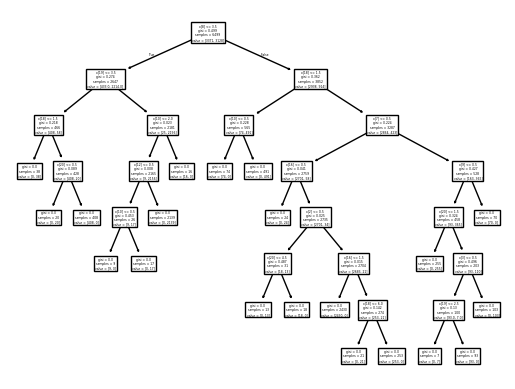

In [124]:
tree.plot_tree(clf2);

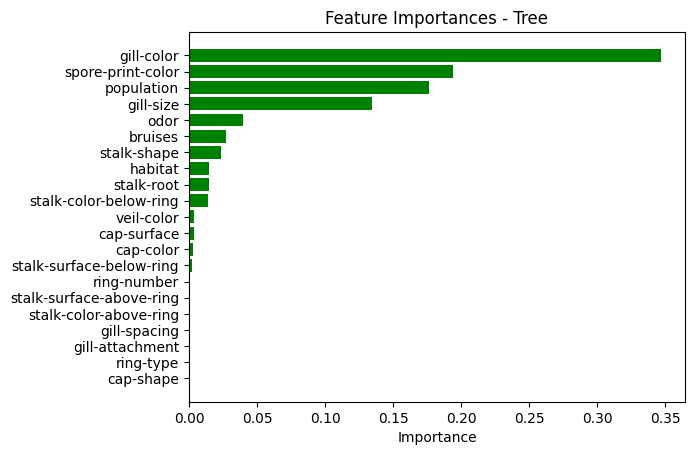

In [134]:
find_important_feature(variables, clf2, model_name, color="green")

### SVM

In [135]:
clf1 = svm.SVC(kernel='linear')
# Train the model - svm
clf1.fit(X_train, y_train)
predict_svm = clf1.predict(X_test)

accuracy = accuracy_score(y_test, predict_svm)
confusion_svm = confusion_matrix(y_test, predict_svm)

print(accuracy)
print(confusion_svm)

model_name = "SVM"
precision = precision_score(y_test, predict_svm)
recall = recall_score(y_test, predict_svm)
f1 = f1_score(y_test, predict_svm)
roc_auc = roc_auc_score(y_test, predict_svm)

performance_metrics.loc[len(performance_metrics)] = [model_name,accuracy,precision,recall,f1,roc_auc]
performance_metrics.head()

0.9618461538461538
[[821  16]
 [ 46 742]]


,method,accuracy,precision,recall,f1,roc_auc
0,GNB,0.912615,0.907828,0.912437,0.910127,0.912610
1,Tree,1.000000,1.000000,1.000000,1.000000,1.000000
2,SVM,0.961846,0.978892,0.941624,0.959897,0.961254


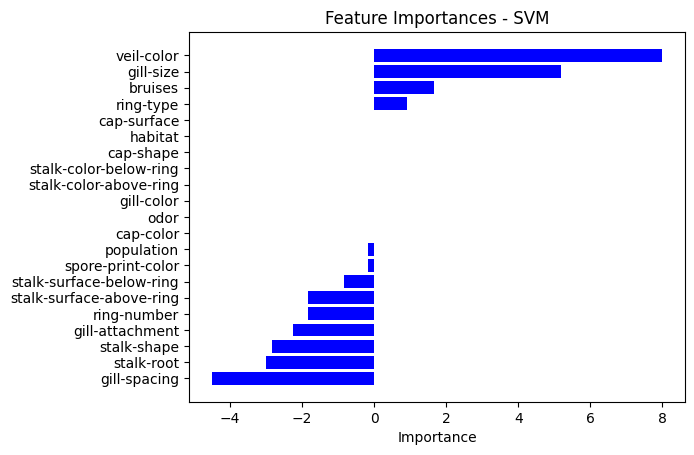

In [28]:
find_important_feature_svc(variables, clf1, model_name, color="blue")

### Performance Metrics

In [137]:
performance_metrics.head()

,method,accuracy,precision,recall,f1,roc_auc
0,GNB,0.912615,0.907828,0.912437,0.910127,0.912610
1,Tree,1.000000,1.000000,1.000000,1.000000,1.000000
2,SVM,0.961846,0.978892,0.941624,0.959897,0.961254


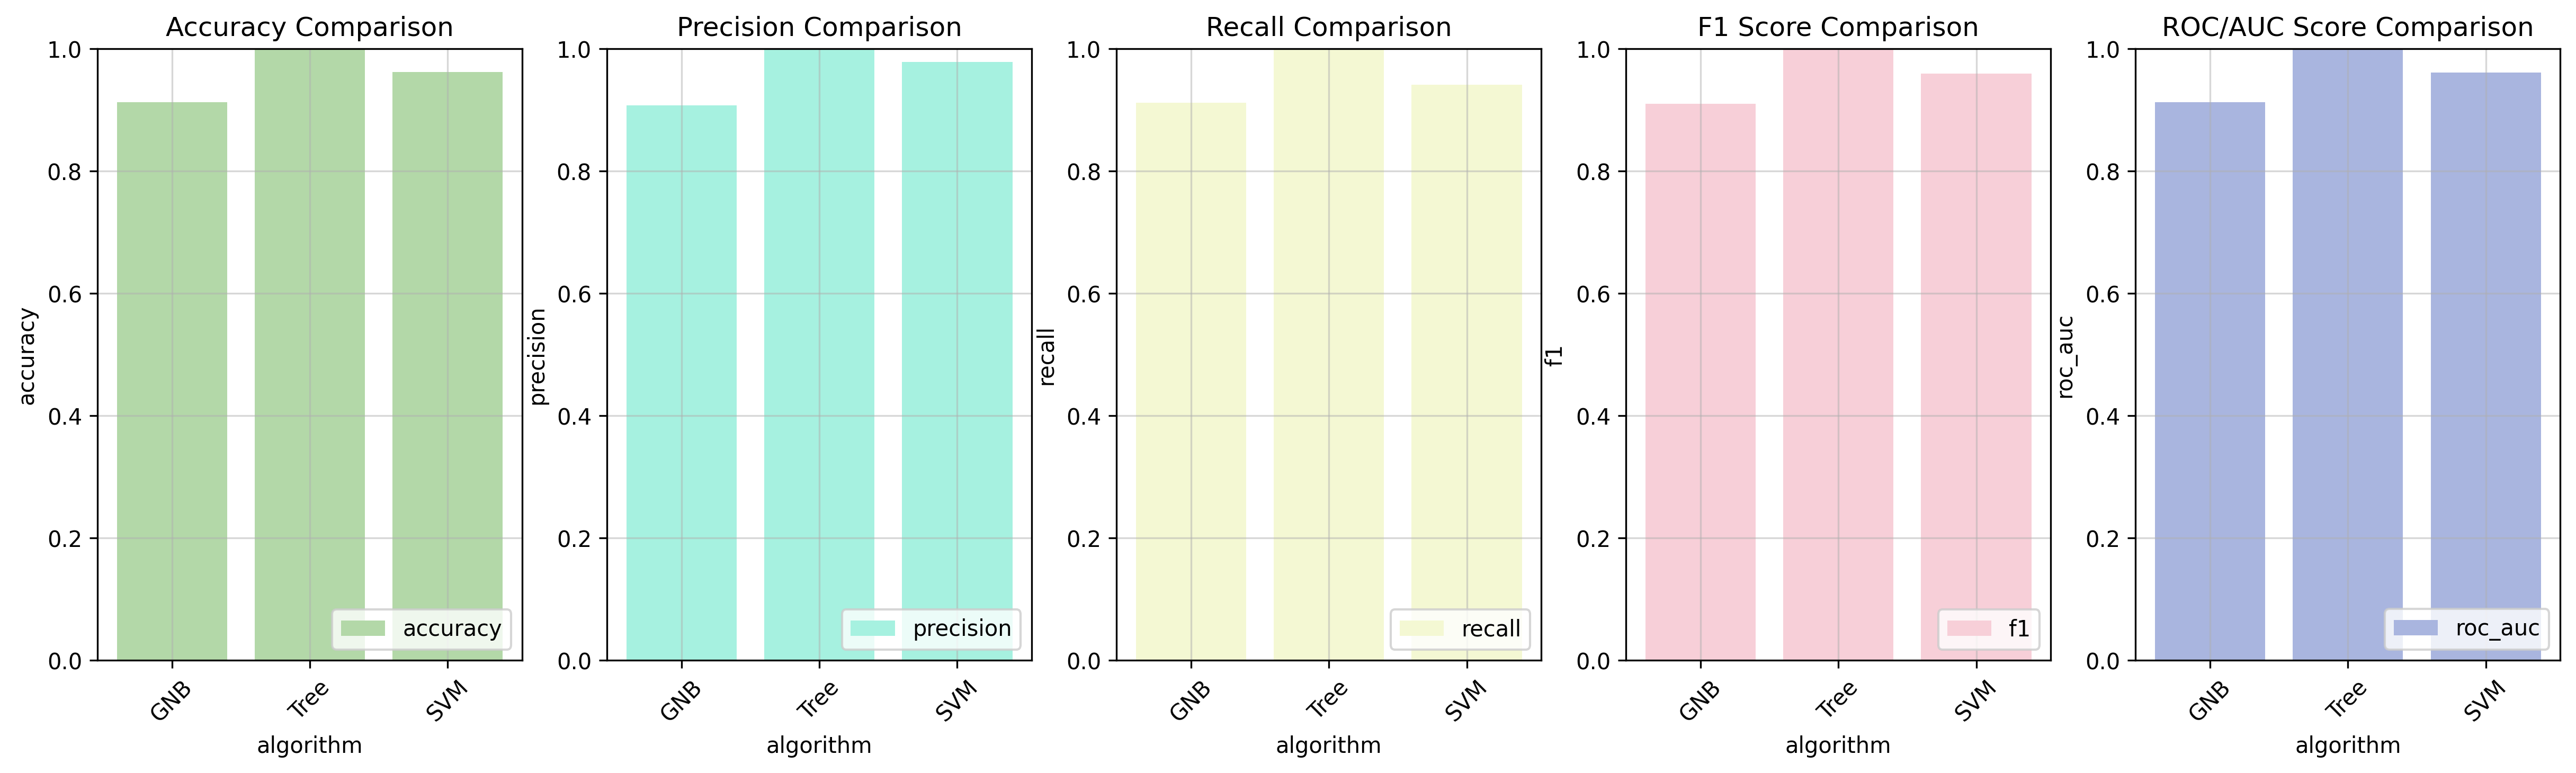

In [138]:
# Compare all metrics
fig, ax = plt.subplots(1, 5, sharex=True, sharey=False, figsize=(20, 5), dpi=300)
x_labels = performance_metrics['method']
indices = np.arange(len(x_labels))
width = 0.3

#row=0, col=0
ax[0].bar(indices,performance_metrics['accuracy'],color="#B3D8A8",alpha=1,label="accuracy")
ax[0].grid(True,alpha=0.5)
ax[0].set_ylim(0,1)
ax[0].set_xlabel("algorithm")
ax[0].set_ylabel("accuracy")
ax[0].set_title("Accuracy Comparison")
ax[0].legend(loc='lower right')
ax[0].set_xticks(indices, x_labels, rotation=45)

#row=0, col=1
ax[1].bar(indices,performance_metrics['precision'],color="#A6F1E0",alpha=1,label="precision")
ax[1].grid(True,alpha=0.5)
ax[1].set_ylim(0,1)
ax[1].set_xlabel("algorithm")
ax[1].set_ylabel("precision")
ax[1].set_title("Precision Comparison")
ax[1].legend(loc='lower right')
ax[1].set_xticks(indices, x_labels, rotation=45)

#row=0, col=2
ax[2].bar(indices,performance_metrics['recall'],color="#F4F8D3",alpha=1,label="recall")
ax[2].grid(True,alpha=0.5)
ax[2].set_ylim(0,1)
ax[2].set_xlabel("algorithm")
ax[2].set_ylabel("recall")
ax[2].set_title("Recall Comparison")
ax[2].legend(loc='lower right')
ax[2].set_xticks(indices, x_labels, rotation=45)

#row=0, col=3
ax[3].bar(indices,performance_metrics['f1'],color="#F7CFD8",alpha=1,label="f1")
ax[3].grid(True,alpha=0.5)
ax[3].set_ylim(0,1)
ax[3].set_xlabel("algorithm")
ax[3].set_ylabel("f1")
ax[3].set_title("F1 Score Comparison")
ax[3].legend(loc='lower right')
ax[3].set_xticks(indices, x_labels, rotation=45)

#row=0, col=4
ax[4].bar(indices,performance_metrics['roc_auc'],color="#A9B5DF",alpha=1,label="roc_auc")
ax[4].grid(True,alpha=0.5)
ax[4].set_ylim(0,1)
ax[4].set_xlabel("algorithm")
ax[4].set_ylabel("roc_auc")
ax[4].set_title("ROC/AUC Score Comparison")
ax[4].legend(loc='lower right')
ax[4].set_xticks(indices, x_labels, rotation=45)

### Confusion Matrix

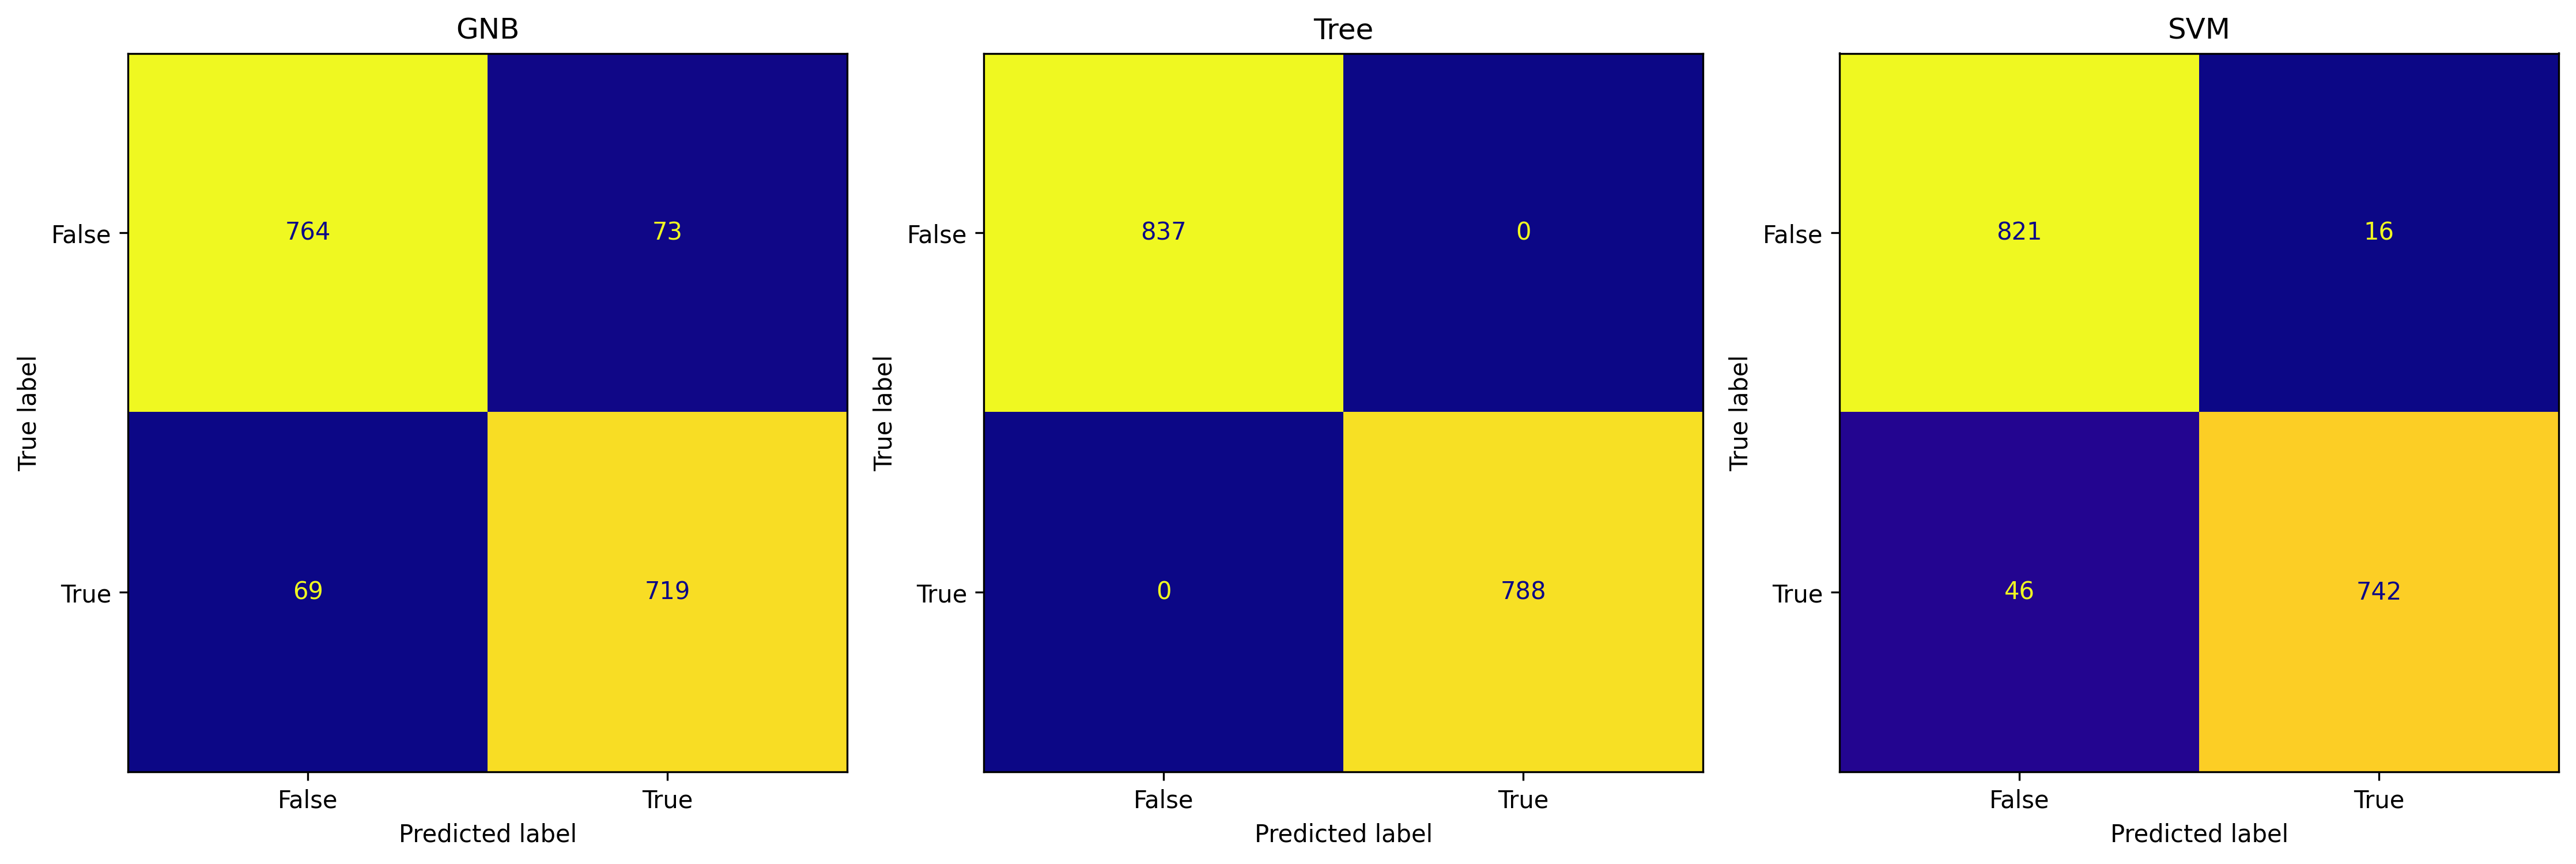

In [141]:
# Compare confusion matrices for this stage of analysis
x_labels = performance_metrics['method']
indices = np.arange(len(x_labels))

fig, ax = plt.subplots(1,3,sharex=True, sharey=False, figsize=(15, 5), dpi=300)

for i, label in enumerate(x_labels):
    ax[i].set_title(label)

ConfusionMatrixDisplay(confusion_gnb,display_labels=[False,True]).plot(ax=ax[0],cmap='plasma',colorbar=False)
ConfusionMatrixDisplay(confusion_tree,display_labels=[False,True]).plot(ax=ax[1],cmap='plasma',colorbar=False)
ConfusionMatrixDisplay(confusion_svm,display_labels=[False,True]).plot(ax=ax[2],cmap='plasma',colorbar=False)

plt.tight_layout()
fig.show()

## Step 4. Report

In this project, a dataset of mushrooms is analyzed to predict whether a mushroom is edible (e) or poisonous (p). The given dataset contains 22 different features describing the characteristics of each mushroom. The objective is to preprocess the data and apply machine learning algorithms to predict the edibility of mushrooms. For this assignment, three algorithms are applied: Gaussian Naive Bayes (GNB), Decision Trees (Tree), and Support Vector Machines (SVM). **After running these algorithms, SVM is considered as the most ideal algorithm in terms of accuracy and precision, and veil color & gill size become the most significant feature to determine whether a mushroom is edible accordingly.**

The dataset consists of 22 columns, each representing a specific feature of the mushroom. The first column is the target column, which indicates whether the mushroom is edible (e) or poisonous (p). This `class` column is the column we aimed to predict.

Each feature in the original dataset is represented by a unique character, like 'e' for edible or 'p' for poisonous. To make the data work with machine learning algorithms, we converted these characters into numbers, like e = 0 (edible) and p = 1 (poisonous).

After preprocessing the data, three different machine learning algorithms are applied with the following performance summary.



In [140]:
performance_metrics.head()

,method,accuracy,precision,recall,f1,roc_auc
0,GNB,0.912615,0.907828,0.912437,0.910127,0.912610
1,Tree,1.000000,1.000000,1.000000,1.000000,1.000000
2,SVM,0.961846,0.978892,0.941624,0.959897,0.961254


The **Decision Tree** algorithm achieved 100% accuracy, which means that it correctly predicted whether every mushroom in the dataset was edible or poisonous. While this might be impressive, it's more likely to be overfitting, which occurs when a model learns the training data too well, including its noise and outliers, and performs poorly on new, unseen data. In real-world scenarios, a 100% accuracy is rare and often unrealistic.

**GNB** achieved an accuracy of 91.26%, which is good but not as great as SVM. It performed well in terms of precision (90.78%) and recall (91.24%), meaning it was fairly reliable in identifying both edible and poisonous mushrooms. However, its performance was slightly lower than SVM in all metrics.

**SVM** achieved an accuracy of 96.18%, which is the second-highest after the Decision Tree. It had the highest precision (97.89%), meaning it was very good at correctly identifying poisonous mushrooms without many false positives. Its recall (94.16%) and F1 score (95.99%) were also strong, indicating a good balance between precision and recall.

In terms of the confusion matrix, GNB correctly predicted 764 edible mushrooms and 719 poisonous mushrooms. However, it made 73 false positives (edible mushrooms predicted as poisonous) and 69 false negatives (poisonous mushrooms predicted as edible). The false positives and false negatives are relatively balanced, but there's room for improvement, especially in reducing the number of misclassified poisonous mushrooms (false negatives), which could be dangerous in real-world scenarios.

Tree has no false positives or false negatives, which is a clear sign of overfitting - the model has likely memorized the training data and may not generalize well to new, unseen data. In real-world applications, such a model would likely perform poorly on new data.

SVM correctly predicted 821 edible mushrooms and 742 poisonous mushrooms. However, it made 16 false positives (edible mushrooms predicted as poisonous) and 46 false negatives (poisonous mushrooms predicted as edible). The low number of false positives is acceptable here, because it means the model rarely misclassifies edible mushrooms as poisonous, which minimizes the risk of wasting edible mushrooms. The number of false negatives (46) is higher than the false positives, but it's still relatively low compared to GNB, and this model is better at identifying poisonous mushrooms correctly in terms of safety.

Overall, the Support Vector Machine (SVM) can be the best choice for this task, as it achieved a high accuracy of 96.18%, which is very close to the perfect score of the Decision Tree but without the risk of overfitting, and the highest precision (97.89%), meaning it was excellent at identifying poisonous mushrooms correctly.
SVM also provided a great balance between precision and recall, making it a reliable model for real-world applications. While the Decision Tree achieves perfect accuracy, it's likely overfitted and won't perform as well on new data. The other algorithm GNB performed well but was slightly less accurate and precise compared to SVM.

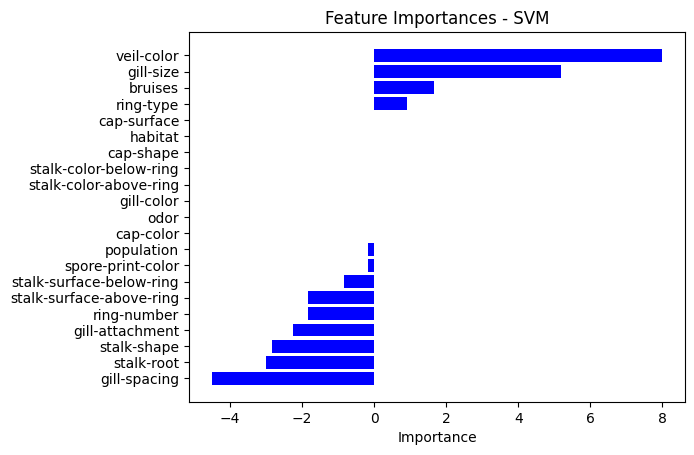

In [29]:
# Find the most important feature for prediction in SVM
clf1 = svm.SVC(kernel='linear')
clf1.fit(X_train, y_train)
predict_svm = clf1.predict(X_test)
model_name = "SVM"
find_important_feature_svc(variables, clf1, model_name, color="blue")

According to the SVM model, veil color and gill size are the most important features to indicate whether a mushroom is edible or poisonous. Therefore, I suggest bringing SVM model while hunting mushrooms in the forest, and carefully observe the veil color, gill size, bruises, and ring type of the target mushrooms to assist the model with better prediction.  